In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
transaction = pd.read_excel('QVI_transaction_data.xlsx',parse_dates=True)
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


I will start with creating copies of the daatasets, so if something goes wrong later I don't have to rewrite everything.

In [4]:
df1 = transaction.copy()
df2 = purchase.copy()

In [5]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object

I don't observe any values missing. Let's look up at the PROD_NAME, if there's any anomalies.

In [6]:
df1.PROD_NAME.head(50)

0       Natural Chip        Compny SeaSalt175g
1                     CCs Nacho Cheese    175g
2       Smiths Crinkle Cut  Chips Chicken 170g
3       Smiths Chip Thinly  S/Cream&Onion 175g
4     Kettle Tortilla ChpsHny&Jlpno Chili 150g
5     Old El Paso Salsa   Dip Tomato Mild 300g
6     Smiths Crinkle Chips Salt & Vinegar 330g
7        Grain Waves         Sweet Chilli 210g
8      Doritos Corn Chip Mexican Jalapeno 150g
9        Grain Waves Sour    Cream&Chives 210G
10    Smiths Crinkle Chips Salt & Vinegar 330g
11       Kettle Sensations   Siracha Lime 150g
12                    Twisties Cheese     270g
13            WW Crinkle Cut      Chicken 175g
14              Thins Chips Light&  Tangy 175g
15                           CCs Original 175g
16                           Burger Rings 220g
17      NCC Sour Cream &    Garden Chives 175g
18     Doritos Corn Chip Southern Chicken 150g
19                    Cheezels Cheese Box 125g
20           Smiths Crinkle      Original 330g
21      NCC S

In [7]:
df1.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

I want to extract product size in a separate from product name column for a better use.

In [8]:
df1['PROD_NAME'] = df1.PROD_NAME.str.replace('G', '')
df1['PROD_NAME'] = df1.PROD_NAME.str.replace('g', '')
df1['Weight'] = df1.PROD_NAME.str.extract('(\d+)')
df1['PROD_NAME'] = df1.PROD_NAME.str.replace('(\d+)', '')

df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150


In [9]:
df1.PROD_NAME = df1.PROD_NAME.str.lower()

In [10]:
df1.PROD_NAME.unique()

array(['natural chip        compny seasalt', 'ccs nacho cheese    ',
       'smiths crinkle cut  chips chicken ',
       'smiths chip thinly  s/cream&onion ',
       'kettle tortilla chpshny&jlpno chili ',
       'old el paso salsa   dip tomato mild ',
       'smiths crinkle chips salt & vinear ',
       'rain waves         sweet chilli ',
       'doritos corn chip mexican jalapeno ',
       'rain waves sour    cream&chives ',
       'kettle sensations   siracha lime ', 'twisties cheese     ',
       'ww crinkle cut      chicken ', 'thins chips liht&  tany ',
       'ccs oriinal ', 'burer rins ', 'ncc sour cream &    arden chives ',
       'doritos corn chip southern chicken ', 'cheezels cheese box ',
       'smiths crinkle      oriinal ', 'infzns crn crnchers tany camole ',
       'kettle sea salt     and vinear ',
       'smiths chip thinly  cut oriinal ', 'kettle oriinal ',
       'red rock deli thai  chilli&lime ', 'prinles sthrn friedchicken ',
       'prinles sweet&spcy bbq ', 'r

In [11]:
dips = df1[df1['PROD_NAME'].str.contains('dip')]
dips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
5,43604,4,4074,2982,57,old el paso salsa dip tomato mild,1,5.1,300
25,43600,39,39144,35506,57,old el paso salsa dip tomato mild,1,5.1,300
39,43330,55,55072,48878,107,smiths crinkle cut french oniondip,1,2.6,150
71,43327,94,94233,93956,65,old el paso salsa dip chnky tom ht,1,5.1,300
83,43600,111,111487,113669,107,smiths crinkle cut french oniondip,1,2.6,150
...,...,...,...,...,...,...,...,...,...
264670,43374,265,265066,263358,107,smiths crinkle cut french oniondip,2,5.2,150
264675,43575,265,265103,263419,59,old el paso salsa dip tomato med,1,5.1,300
264717,43398,266,266230,264056,107,smiths crinkle cut french oniondip,1,2.6,150
264746,43391,268,268200,264616,107,smiths crinkle cut french oniondip,1,2.6,150


In [12]:
dips.reset_index(inplace = True)

In [13]:
index = dips['index']
index = index.to_list()
index

[5,
 25,
 39,
 71,
 83,
 87,
 114,
 131,
 149,
 178,
 207,
 220,
 274,
 279,
 281,
 296,
 307,
 322,
 323,
 399,
 445,
 448,
 481,
 483,
 491,
 508,
 512,
 541,
 545,
 560,
 585,
 596,
 621,
 683,
 705,
 710,
 740,
 756,
 782,
 794,
 809,
 827,
 958,
 976,
 990,
 1026,
 1049,
 1124,
 1146,
 1150,
 1223,
 1227,
 1250,
 1251,
 1252,
 1258,
 1269,
 1346,
 1366,
 1526,
 1533,
 1534,
 1656,
 1662,
 1675,
 1678,
 1690,
 1692,
 1716,
 1721,
 1752,
 1763,
 1798,
 1824,
 1834,
 1856,
 1901,
 1902,
 1954,
 2053,
 2060,
 2084,
 2102,
 2173,
 2227,
 2251,
 2253,
 2271,
 2340,
 2386,
 2393,
 2410,
 2415,
 2478,
 2504,
 2522,
 2582,
 2600,
 2607,
 2613,
 2654,
 2657,
 2670,
 2782,
 2790,
 2794,
 2809,
 2810,
 2834,
 2845,
 2851,
 2926,
 2933,
 2984,
 3009,
 3024,
 3037,
 3069,
 3104,
 3173,
 3200,
 3206,
 3222,
 3254,
 3258,
 3303,
 3325,
 3345,
 3394,
 3402,
 3409,
 3459,
 3482,
 3484,
 3546,
 3579,
 3614,
 3635,
 3662,
 3667,
 3668,
 3751,
 3779,
 3826,
 3831,
 3843,
 3922,
 3925,
 3935,
 3948,
 3

In [14]:
df1.drop(index, axis=0, inplace=True)
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
0,43390,1,1000,1,5,natural chip compny seasalt,2,6.0,175
1,43599,1,1307,348,66,ccs nacho cheese,3,6.3,175
2,43605,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170
3,43329,2,2373,974,69,smiths chip thinly s/cream&onion,5,15.0,175
4,43330,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8,175
264832,43325,272,272358,270154,74,tostitos splash of lime,1,4.4,175
264833,43410,272,272379,270187,51,doritos mexicana,2,8.8,170
264834,43461,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8,150


In [15]:
df1.PROD_NAME.unique()

array(['natural chip        compny seasalt', 'ccs nacho cheese    ',
       'smiths crinkle cut  chips chicken ',
       'smiths chip thinly  s/cream&onion ',
       'kettle tortilla chpshny&jlpno chili ',
       'smiths crinkle chips salt & vinear ',
       'rain waves         sweet chilli ',
       'doritos corn chip mexican jalapeno ',
       'rain waves sour    cream&chives ',
       'kettle sensations   siracha lime ', 'twisties cheese     ',
       'ww crinkle cut      chicken ', 'thins chips liht&  tany ',
       'ccs oriinal ', 'burer rins ', 'ncc sour cream &    arden chives ',
       'doritos corn chip southern chicken ', 'cheezels cheese box ',
       'smiths crinkle      oriinal ', 'infzns crn crnchers tany camole ',
       'kettle sea salt     and vinear ',
       'smiths chip thinly  cut oriinal ', 'kettle oriinal ',
       'red rock deli thai  chilli&lime ', 'prinles sthrn friedchicken ',
       'prinles sweet&spcy bbq ', 'red rock deli sr    salsa & mzzrlla ',
       't

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254074 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            254074 non-null  int64  
 1   STORE_NBR       254074 non-null  int64  
 2   LYLTY_CARD_NBR  254074 non-null  int64  
 3   TXN_ID          254074 non-null  int64  
 4   PROD_NBR        254074 non-null  int64  
 5   PROD_NAME       254074 non-null  object 
 6   PROD_QTY        254074 non-null  int64  
 7   TOT_SALES       254074 non-null  float64
 8   Weight          254074 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 19.4+ MB


I extracted weight, but the datat type is incorrect. Let's fix that.

In [17]:
df1.Weight = pd.to_numeric(df1.Weight)

Checking if it's fixed.

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254074 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            254074 non-null  int64  
 1   STORE_NBR       254074 non-null  int64  
 2   LYLTY_CARD_NBR  254074 non-null  int64  
 3   TXN_ID          254074 non-null  int64  
 4   PROD_NBR        254074 non-null  int64  
 5   PROD_NAME       254074 non-null  object 
 6   PROD_QTY        254074 non-null  int64  
 7   TOT_SALES       254074 non-null  float64
 8   Weight          254074 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 19.4+ MB


Next, I want to extract numerical values only and see their distribution.

<Figure size 432x288 with 0 Axes>

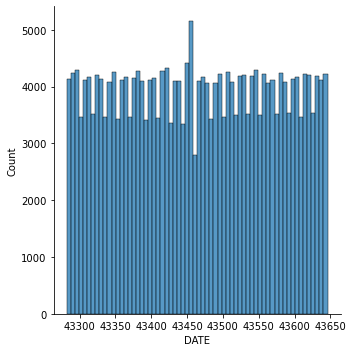

<Figure size 432x288 with 0 Axes>

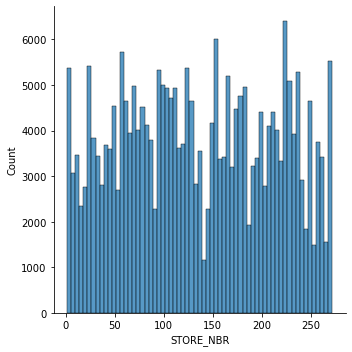

<Figure size 432x288 with 0 Axes>

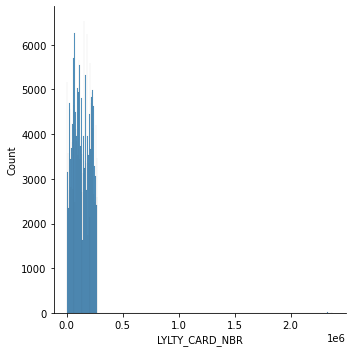

<Figure size 432x288 with 0 Axes>

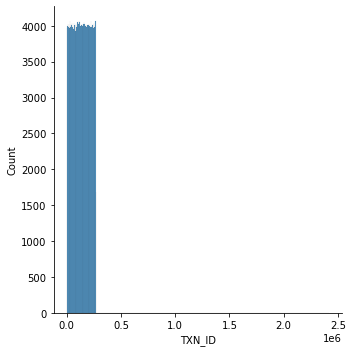

<Figure size 432x288 with 0 Axes>

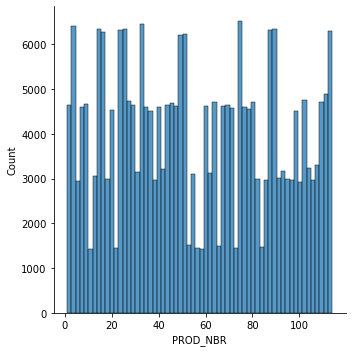

<Figure size 432x288 with 0 Axes>

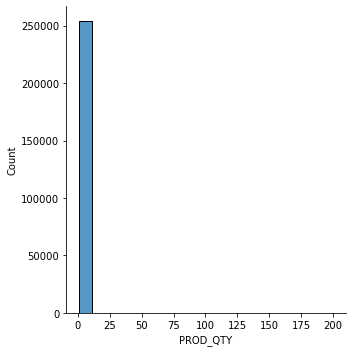

In [ ]:
num_var = df1.select_dtypes(['int64','float64'])

for num in num_var:
    plt.figure()
    sns.displot(num_var[num])
    plt.show()

Let's look up at the description statistics and spot if we hav outliers.

In [ ]:
num_var.describe()

In [ ]:
sns.boxplot(num_var.TOT_SALES)

In [ ]:
sns.boxplot(num_var.PROD_QTY)

Box plots as well as description table show that we have outliers at product quality (200) and total sales (650.0).

In [ ]:
df1.loc[num_var.TOT_SALES>600]

We can observe, that Dorito Corn Chp Supreme was sold in quantity of 200 with total sales 650. Per price for 1 pack is 3.25. 

**3.25*200 = 650**

We will not remove the outliers as they carry important information about the orders.

In [ ]:
df1.loc[num_var.LYLTY_CARD_NBR==226000]

In [ ]:
df1.drop(index=[69762,69763])

In [ ]:
df = df2.merge(df1, on = 'LYLTY_CARD_NBR')
df


Let's see if there's any human errors or mistakes in categories names.

In [ ]:
df.LIFESTAGE.unique() 

In [ ]:
df.PREMIUM_CUSTOMER.unique()

In [ ]:
df['BRAND'] = df['PROD_NAME'].str.split(' ').str[0]

In [ ]:
df['BRAND'].unique()

In [ ]:
df['PROD_NAME'].unique()

In [ ]:
df['BRAND']=df['BRAND'].replace('rrd', 'red', regex=True)
df['BRAND']=df['BRAND'].replace('rnwves', 'rain', regex=True)
df['BRAND']=df['BRAND'].replace('ww', 'woolworths', regex=True)
df['BRAND']=df['BRAND'].replace('smith', 'smiths', regex=True)
df['BRAND']=df['BRAND'].replace('snbts', 'sunbites', regex=True)
df['BRAND']=df['BRAND'].replace('infzns', 'infuzions', regex=True)
df['BRAND']=df['BRAND'].replace('ncc', 'natural', regex=True)

In [ ]:
df

In [ ]:
df['BRAND'].unique()

In [ ]:
df.info()

In [ ]:
df

### Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(data = df, x='LIFESTAGE', y='TOT_SALES', hue = 'PREMIUM_CUSTOMER')

We see that most on chips spend **Young/Single couples(Mainstream)**, **Midage/Single couples(Mainstream)**

### How many customers are in each segment

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(data = df, x='LIFESTAGE')

In [ ]:
df.LIFESTAGE.value_counts()

### How many chips are bought per customer by segment

In [ ]:
chips_1 = df[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY']]
maximum = chips_1.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER']).sum()
maximum.sort_values(by='PROD_QTY', ascending=False)

In [ ]:
chips = df[['LIFESTAGE','PROD_QTY']]
maximum = chips.groupby(by='LIFESTAGE').sum()
maximum.sort_values(by='PROD_QTY', ascending=False)

### What's the average chip price by customer segment

In [ ]:
price = df[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES','PROD_QTY']]
price['PER_PACK'] = price['TOT_SALES']/price['PROD_QTY']
price = price.drop(columns=['TOT_SALES','PROD_QTY'])
av_price = price.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER']).mean()
av_price

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(data = price, x='LIFESTAGE', y='PER_PACK', hue='PREMIUM_CUSTOMER')
plt.title('Average chip price by customer segment', size = 20)

### Perform an independent t-test between mainstream midage and young singles and couples

H0: There's no difference between mainstream midage and young singles and couples. 

H1: At least one customer segment is different.

In [ ]:
young_coup = price.loc[(price.LIFESTAGE == 'YOUNG SINGLES/COUPLES') | (price.LIFESTAGE == 'MIDAGE SINGLES/COUPLES')]
young_coup

In [ ]:
samp1=young_coup.loc[(young_coup.PREMIUM_CUSTOMER=='Mainstream') &(young_coup.LIFESTAGE=='YOUNG SINGLES/COUPLES')]
samp1 = samp1.sample(n=10, random_state = 14)
samp1.reset_index(inplace=True)

samp1

In [ ]:
samp2=young_coup.loc[(young_coup.PREMIUM_CUSTOMER=='Mainstream') &(young_coup.LIFESTAGE=='MIDAGE SINGLES/COUPLES')]
samp2 = samp2.sample(n=10, random_state = 14)
samp2.reset_index(inplace=True)

samp2

In [ ]:
samp1 = pd.Series(samp1.PER_PACK, name = 'YOUNG')
samp2 = pd.Series(samp2.PER_PACK, name = 'MIDAGE')

In [ ]:
test_table = pd.concat([samp1,samp2], axis=1)
test_table

In [ ]:
print('YOUNG MEAN IS: ', round(test_table.YOUNG.mean(),2))
print('MIDAGE MEAN IS: ', round(test_table.MIDAGE.mean(),2))

In [ ]:
print('OVERALL MEAN IS: ', round((4.09+3.36)/2,2))

In [ ]:
print('SST IS: ', round(sum((test_table.YOUNG - 3.72)**2+(test_table.MIDAGE - 3.72)**2),2))

In [ ]:
print('SSC IS: ', round(10*(4.09-3.72)**2+10*(3.36-3.72)**2,2))

In [ ]:
print('SSE IS: ', round(sum((test_table.YOUNG - 4.09)**2+(test_table.MIDAGE - 3.36)**2),2))

In [ ]:
print('MSC IS: ', round(2.67/(2-1),2))

In [ ]:
print('MSE IS: ', round(29.77/(20-2),2))

In [ ]:
print('F-TEST IS:', round(2.67/1.65,2))

CV from the table is 4.41 with df between = 1 and df within = 18. There's no significant difference in mean test score between mainstream midage couples and mainstream young couple as we don't reject H0.

### Brands that midage couples and young couple prefer more than others

In [ ]:
df

In [ ]:
brands = df[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY','BRAND']]
brands = brands.loc[(brands.LIFESTAGE=='YOUNG SINGLES/COUPLES')|(brands.LIFESTAGE=='MIDAGE SINGLES/COUPLES')]
brands

In [ ]:
pivot = pd.pivot_table(data = brands,
                      values='PROD_QTY',
                      index = 'BRAND',
                      columns = 'LIFESTAGE',
                      aggfunc=np.sum)
pivot

In [ ]:
pivot.plot(kind = 'bar',figsize=(30,10),fontsize=24)

plt.show()

It appears that Kettle Tortilla Chips brand is the most popular. The second place share doritos and pringles.